**P303- Company Stock Price Prediction**
**Type- Forecasting:Time Series Analysis**

Goal- To predict the stock prices for next 3 months

Step 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller # adfuller checks if data is stationary or non-stationary
from pmdarima import auto_arima # from auto_arima we will get order of p,d,q
from statsmodels.tsa.arima.model import ARIMA # ARIMA function for model building
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Step 2. Uploading Required data set

In [2]:
df = pd.read_excel('Company stock prices.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


Step 3: Exploratory Data Analysis

In [3]:
print(type(df)) # Understanding the data structure
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(753, 7)


In [4]:
df.info() #find missing values and understanding the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


Observation: Date columne Data type need to be changed to Datetime

In [5]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


In [7]:
df.isnull().any() # Finding the missing values

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe() # Descriptive statistics

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,414.903107,421.117954,408.519270,414.796653,414.796653,7.060370e+06
std,135.039753,135.568500,134.016834,134.669664,134.669664,7.470407e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,311.570007,319.799988,308.850006,313.480011,313.480011,3.629200e+06
50%,418.399994,425.260010,411.880005,416.029999,416.029999,5.277700e+06
75%,519.900024,526.380005,513.789978,519.780029,519.780029,7.973300e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


Step 4: Data Visualisation

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Month & Year Extraction from date column for better visualisation
df["month"] = df.Date.dt.strftime("%b")
df["year"] = df.Date.dt.strftime("%Y")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,month,year
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500,Oct,2020
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020
5,2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100,Oct,2020
6,2020-10-27,490.010010,490.489990,482.929993,488.929993,488.929993,3627200,Oct,2020
7,2020-10-28,486.359985,494.000000,483.279999,486.239990,486.239990,5992700,Oct,2020
8,2020-10-29,488.500000,513.900024,479.339996,504.209991,504.209991,11120700,Oct,2020
9,2020-10-30,502.010010,505.880005,472.209991,475.739990,475.739990,7807900,Oct,2020


In [11]:
df.set_index('Date',inplace=True) # Setting Date column as index.
df.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=753)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500,Oct,2020
2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020
2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020
2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020
2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020
...,...,...,...,...,...,...,...,...
2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900,Oct,2023
2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400,Oct,2023
2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100,Oct,2023


Line Plot

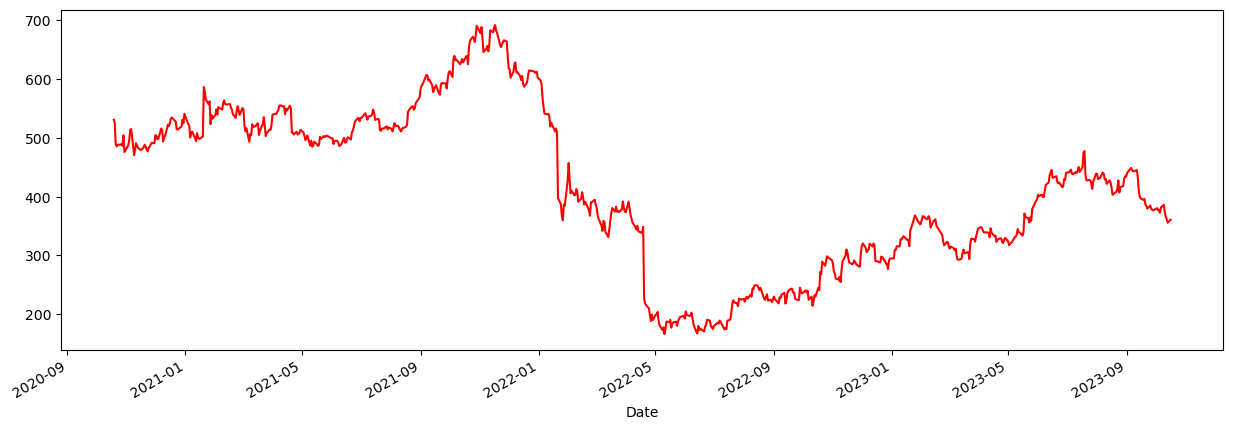

In [13]:
df['Close'].plot(figsize=(15, 5),color='red')
plt.show()

Observation:


1.   Non Seasonality:
There are no Seasonal or regular pattern fluctuations in the Closing stock price
Random Fluctuations are seen in Stock price increase.
Thus we can say there is no seasonality or data is unsystematic.

2.  Quadratic Trend:
No increasing or decreasing trend is seen in the graph even if change the aspect ratio. No scaling effect.



array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

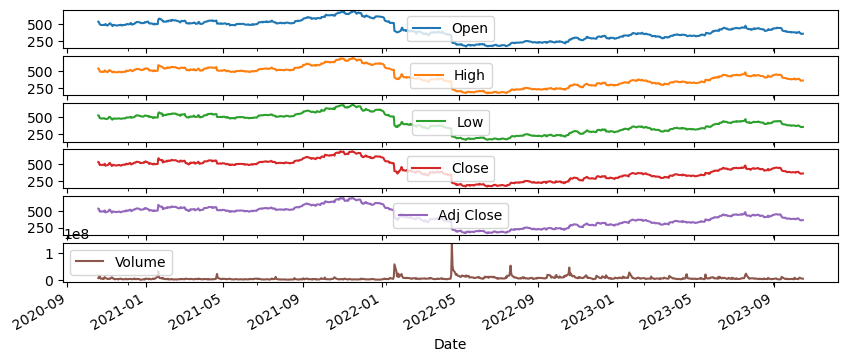

In [14]:
df.plot(subplots=True, figsize=(10, 4))

Observation:
1.  We see highest Volume sales in month of May 2022

Dist Plot: Seaborn Distplot represents the overall distribution of continuous data variables.

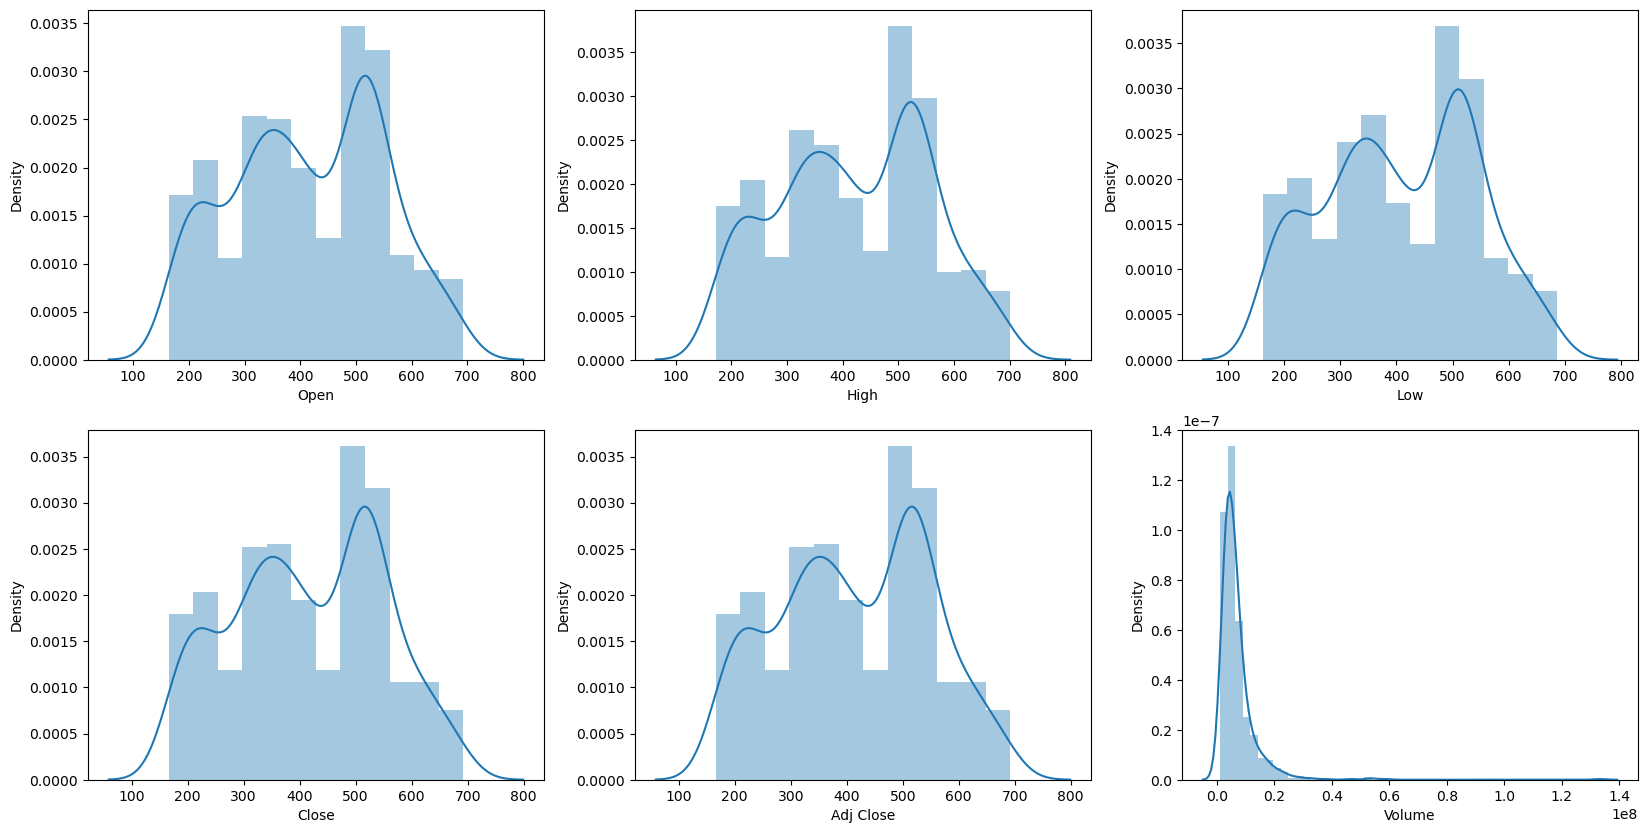

In [15]:
features = ['Open','High','Low','Close','Adj Close','Volume']
plt.subplots(figsize= (20,10))
for i, col in enumerate (features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

Observation:

1.    We see Similar two peeks in Open,High,Close,Adj Close showing the stock prices have varied significatnly at the respective duration.
2.   Also, volume data looks left skewed






<Axes: xlabel='year', ylabel='Volume'>

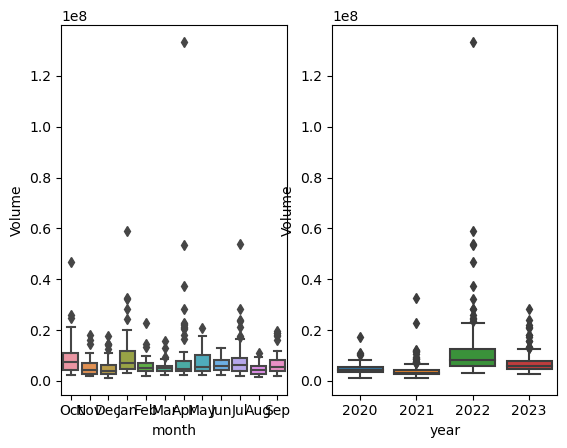

In [16]:
plt.subplot(1,2,1)
sns.boxplot(x='month', y='Volume', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='year', y='Volume', data=df)

Obsevation:

Further when we go for Volume Box plot we can clearly see outlier in data

Heat Map: To better visualize the Mean of Closing Stock Price Month & Year Wise

<Axes: xlabel='month', ylabel='year'>

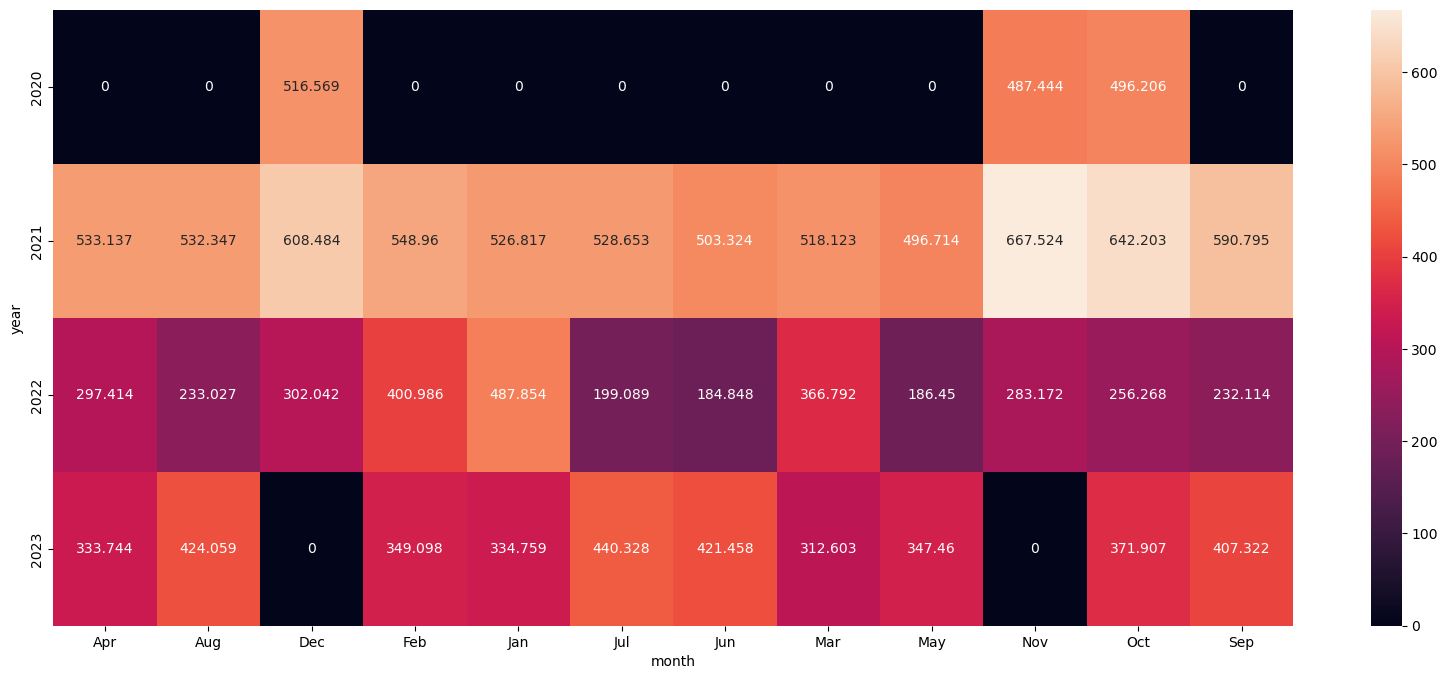

In [17]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Close",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

Pair Plot: used to understand the best set of features to explain a relationship between two variables

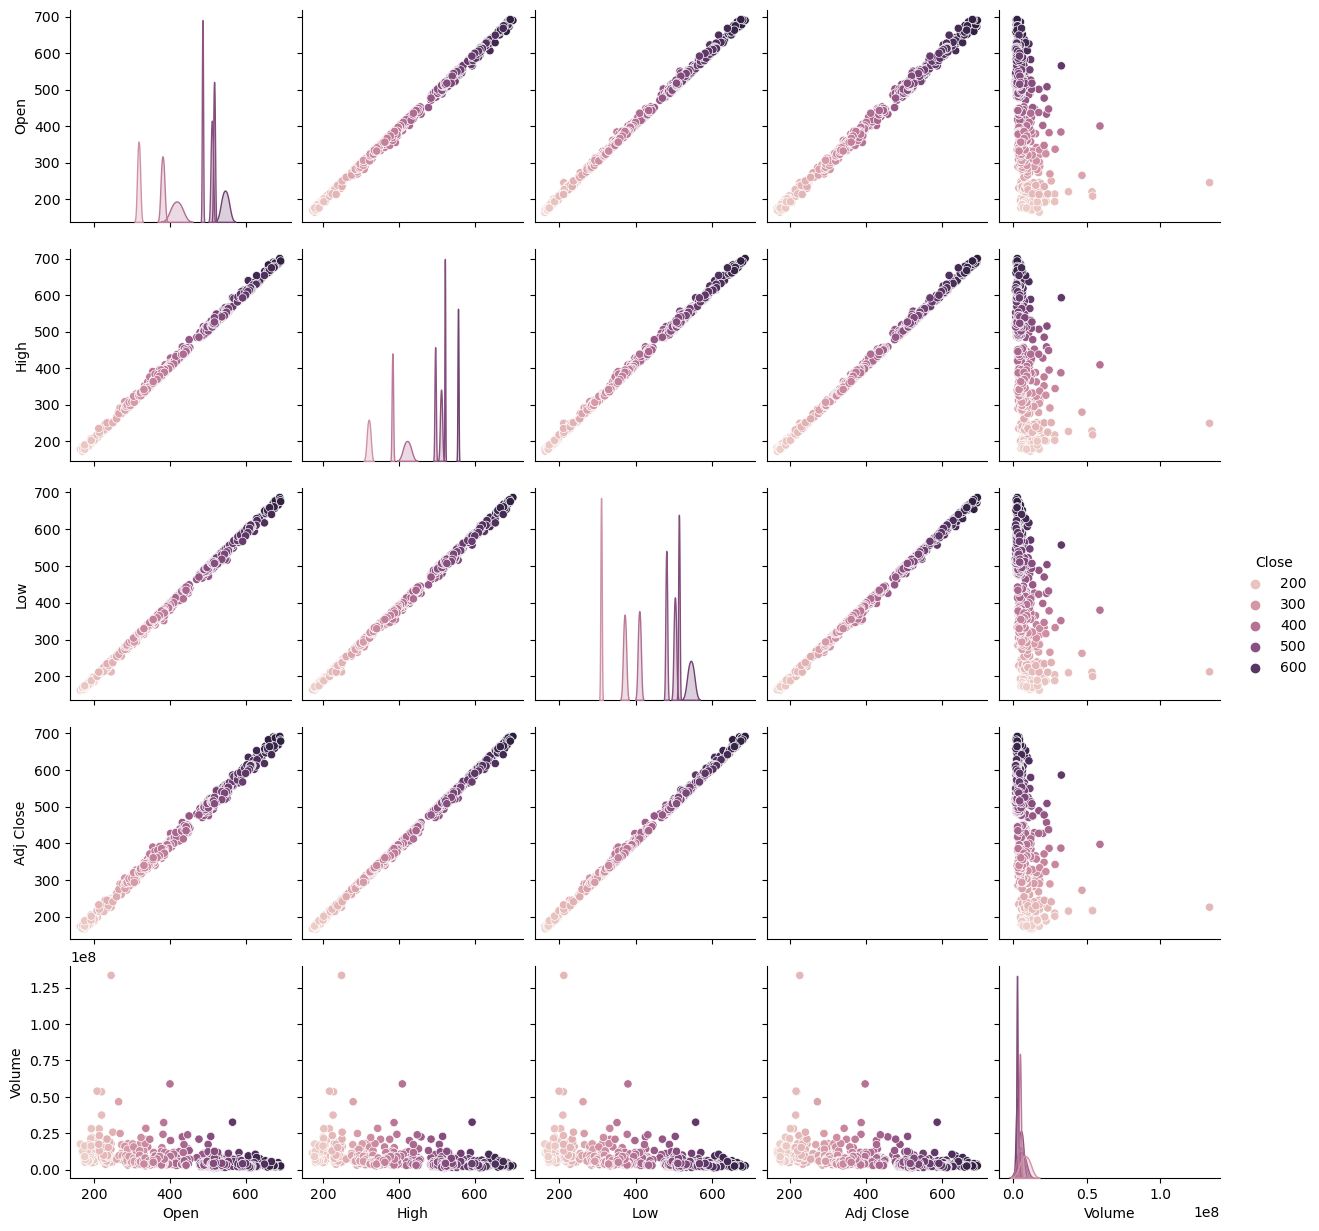

In [18]:
sns.pairplot(df,hue='Close')
plt.show()

In [19]:
correlation = df.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
Low          0.999233
High         0.999224
Open         0.998184
Volume      -0.390191
Name: Close, dtype: float64


# Testing Data for Stationary
adfuller() test gives you different values like p-value, t-value, alpha. But we want only p-value.
based on that we will decide whether data is stationary or non-stationary
If p<0.05 then Data is Stationary
If p>0.05 then Data is Non-Stationary

In [20]:
def ad_test(dataset):
  dftest = adfuller(dataset,autolag='AIC')
  #AIC is the number which will help me to tell whether model is performing good or not
  print("P-Value: ", dftest[1])# dftest[1]: index of p-value is 1.

ad_test(df['Close'])#Function call



P-Value:  0.6196006837361436


In [21]:
# without writing user defined function ad_test we can calculate p-value with adfuller()
dftest=adfuller(df['Close'])
print("P-Value: ", dftest[1])

P-Value:  0.6196006837361436


In [22]:
#First-order difference: diff() - To convert non-stationary data to stationary.
# Stationary dataset: Mean, variance, std deviation is remaining constant throughout the years.
#But graph shows that magnitude of cycle in increasing every year. i.e. no. of passangers in that airline is increasing every year.
# So mean variance std deviance will also change.
# 99% times your Time series data will be non-stationary in nature.

df['Close_Diff']=df['Close'].diff(periods=1)
# In df dataset Month is index. So we have only one column Passengers. Make Passengers column as stationary. Add Passengers_Diff column.
#differencing takes interval of 1 step. For 1st record NAN will be there because before that no data is available. Next 118-112=6, 132-118=14 and so on
#After differencing if we plot it it will be stationary.
df

,Open,High,Low,Close,Adj Close,Volume,month,year,Close_Diff
Date,,,,,,,,,
2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500,Oct,2020,NaN
2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020,-5.299988
2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020,-36.369995
2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020,-3.819977
2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020,3.049988
...,...,...,...,...,...,...,...,...,...
2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900,Oct,2023,-12.630005
2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400,Oct,2023,-7.390014
2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100,Oct,2023,-4.729981


In [23]:
# remove null values - Single null value is there so no need to impute it. We can drop it

df=df.dropna()

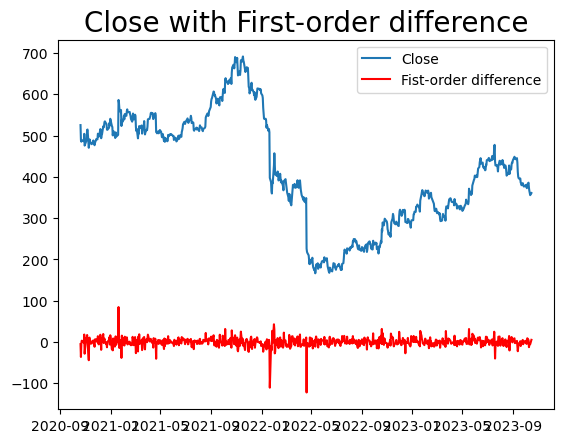

In [24]:
#plot
plt.title("Close with First-order difference", size=20)
plt.plot(df['Close'], label='Close')
plt.plot(df['Close_Diff'], label='Fist-order difference',color='red')
plt.legend()

In [25]:
# Calculate Autocorrelation
acf_values = acf(df['Close_Diff'])
np.round(acf_values,2)
# Prints autocorrelation of current data and all records i.e. 1-step lagged version, 2-step lagged version and so on.
# First value 1 represents autocorr. between current data and itself. so don't consider this.
# Highest is 12th period value: 0.83 i.e. 83%. It tells us a value 12 periods ago has a strong impact on the value today.


array([ 1.  ,  0.03, -0.03,  0.01, -0.02, -0.02, -0.03, -0.01,  0.03,
        0.05,  0.01,  0.02,  0.03,  0.04,  0.05, -0.03, -0.01, -0.06,
        0.04,  0.04,  0.01, -0.02, -0.05, -0.04,  0.01, -0.01,  0.01,
        0.05, -0.04])

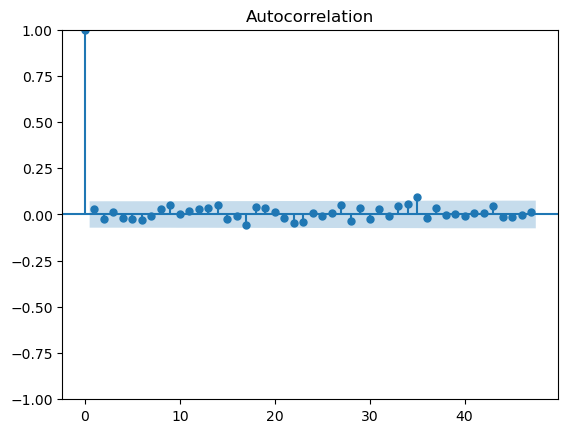

In [26]:
# Plot ACF
plot_acf(df['Close_Diff'], lags=47);
# Blue shaded region is +-2 std error region. Anything within this region is non-significant
# Yt-12 and current data has very high autocorrelation(0.83). Same trend can be seen after every one year.
# So use Yt-12 and Yt-24 for model building as they are having very stron autocorrelation.

In [27]:
# Calculate PACF
pacf_values = pacf(df['Close_Diff'])
np.round(pacf_values,2)
# The correlation value at lag 12 has dropped to 0.61, indicating the direct relationship ia a bit weaker.

array([ 1.  ,  0.03, -0.03,  0.01, -0.02, -0.02, -0.03, -0.01,  0.03,
        0.05,  0.  ,  0.02,  0.03,  0.04,  0.06, -0.03, -0.01, -0.06,
        0.05,  0.03,  0.01, -0.03, -0.06, -0.05,  0.01, -0.  ,  0.01,
        0.04, -0.05])

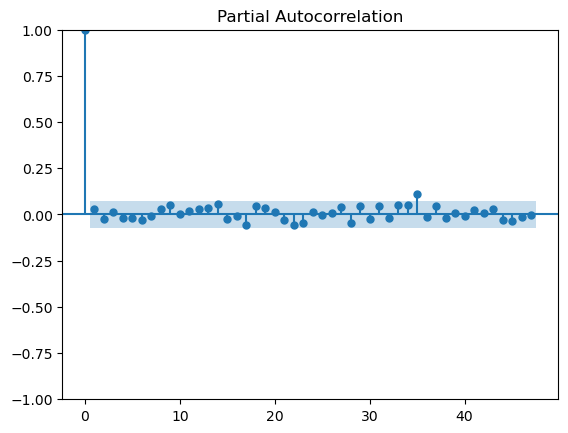

In [28]:
# Plot PACF
plot_pacf(df['Close_Diff'],lags=47);
# This blue area depicts the 95% confidence interval and is an indicator of the significance threshold.
# That means, anything within the blue area is statistically close to zero
# and anything outside the blue area is statistically non-zero.

Observations:
As we see Collinearity between DV -High,Open,adj Close & Close
We can move ahead with reducing the Features.

**LSTM for STock Predictions**

In [29]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .70 ))

training_data_len

527

In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.68348813],
       [0.61425415],
       [0.60698243],
       [0.6127884 ],
       [0.61271223],
       [0.61402572],
       [0.60890503],
       [0.64311275],
       [0.58891721],
       [0.6048694 ],
       [0.61077058],
       [0.62929265],
       [0.66129218],
       [0.66313862],
       [0.57894236],
       [0.59748342],
       [0.61750935],
       [0.60991394],
       [0.6024328 ],
       [0.59531335],
       [0.59822585],
       [0.60043404],
       [0.60591642],
       [0.61271223],
       [0.59059239],
       [0.60250896],
       [0.60654458],
       [0.61865146],
       [0.61739514],
       [0.64381708],
       [0.64153279],
       [0.63037765],
       [0.63188152],
       [0.6651375 ],
       [0.65919815],
       [0.62291557],
       [0.63717353],
       [0.64122821],
       [0.67777732],
       [0.6727519 ],
       [0.68236507],
       [0.69772715],
       [0.70067771],
       [0.69013168],
       [0.68712407],
       [0.66266272],
       [0.66169187],
       [0.671

In [31]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays to train LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data- LSTM model expects input to be 3 dimensional.i.e: no.of samples,number of time steos & number of features.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.68348813, 0.61425415, 0.60698243, 0.6127884 , 0.61271223,
       0.61402572, 0.60890503, 0.64311275, 0.58891721, 0.6048694 ,
       0.61077058, 0.62929265, 0.66129218, 0.66313862, 0.57894236,
       0.59748342, 0.61750935, 0.60991394, 0.6024328 , 0.59531335,
       0.59822585, 0.60043404, 0.60591642, 0.61271223, 0.59059239,
       0.60250896, 0.60654458, 0.61865146, 0.61739514, 0.64381708,
       0.64153279, 0.63037765, 0.63188152, 0.6651375 , 0.65919815,
       0.62291557, 0.63717353, 0.64122821, 0.67777732, 0.6727519 ,
       0.68236507, 0.69772715, 0.70067771, 0.69013168, 0.68712407,
       0.66266272, 0.66169187, 0.67149546, 0.69386278, 0.68190822,
       0.71263226, 0.67861491, 0.6746935 , 0.63603135, 0.65202165,
       0.65489605, 0.63338538, 0.6241529 , 0.64992768, 0.63673568])]
[0.6312533533488665]

[array([0.68348813, 0.61425415, 0.60698243, 0.6127884 , 0.61271223,
       0.61402572, 0.60890503, 0.64311275, 0.58891721, 0.6048694 ,
       0.61077058, 0.62929265, 0.661

In [97]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Flatten

# Build the LSTM model
model = Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64,activation='relu'))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

467/467 [==============================] - 28s 52ms/step - loss: 0.0076 - accuracy: 0.0043


In [98]:
# Create the testing data set
# Create a new array containing scaled values from index 467 to 753
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # these are not scaled values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)


In [99]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#(no.samples,no.of timesteps,no of features)

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 45ms/step


15.744536438379857

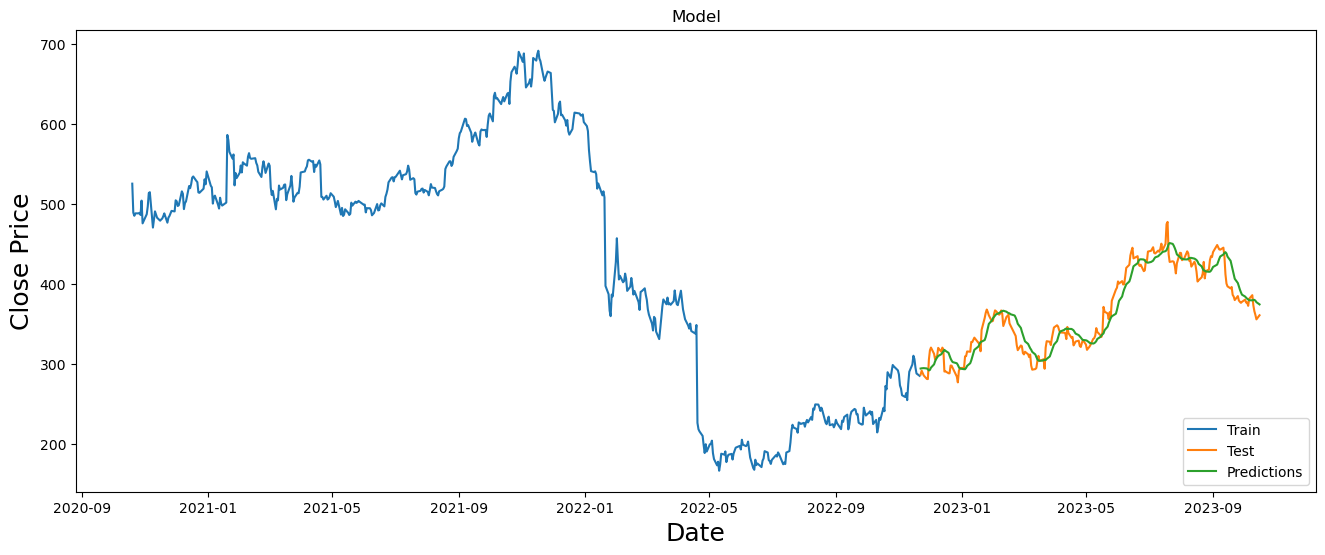

In [100]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [101]:
# Show the valid and predicted prices
test

,Close,Predictions
Date,,
2022-11-22,286.690002,294.184357
2022-11-23,291.500000,294.470795
2022-11-25,285.540009,294.683105
2022-11-28,281.170013,294.299866
2022-11-29,280.959991,293.225281
...,...,...
2023-10-10,373.320007,380.061066
2023-10-11,365.929993,380.040771
2023-10-12,361.200012,379.033966


In [102]:
# forecast for Next 2023-10-17
new_df= df.filter(['Close'])
last=new_df[-60:].values
last_scaled=scaler.transform(last)
X_tst=[]
X_tst.append(last_scaled)
X_tst=np.array(X_tst)
X_tst=np.reshape(X_tst,(X_tst.shape[0],X_tst.shape[1],1))
pred_price=model.predict(X_tst)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 63ms/step
[[371.8767]]


In [39]:
stock=df.reset_index(['Date'])

In [40]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,Close_Diff
0,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020,-5.299988
1,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020,-36.369995
2,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020,-3.819977
3,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020,3.049988
4,2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100,Oct,2020,-0.040009


In [41]:
df1=stock[["Date","Close"]]

In [42]:
#prophet requires the variable name in the time series to be :
#Here y=Target ,ds=Datetime 
df1.columns=['ds','y']

In [43]:
df1.head()

,ds,y
0,2020-10-20,525.419983
1,2020-10-21,489.049988
2,2020-10-22,485.230011
3,2020-10-23,488.279999
4,2020-10-26,488.239990


In [44]:
df1['ds']=pd.to_datetime(df1['ds'])

In [45]:
#predefined library
from prophet import Prophet
model=Prophet()

In [46]:
model.fit(df1)

22:57:22 - cmdstanpy - INFO - Chain [1] start processing
22:57:23 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
model.predict(df1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-20,474.065652,442.297837,506.482171,474.065652,474.065652,0.375826,0.375826,0.375826,-8.705658,-8.705658,-8.705658,9.081484,9.081484,9.081484,0.0,0.0,0.0,474.441477
1,2020-10-21,474.596413,443.602286,509.935204,474.596413,474.596413,2.434828,2.434828,2.434828,-9.524108,-9.524108,-9.524108,11.958936,11.958936,11.958936,0.0,0.0,0.0,477.031240
2,2020-10-22,475.127173,447.131712,512.529068,475.127173,475.127173,5.523640,5.523640,5.523640,-9.100503,-9.100503,-9.100503,14.624143,14.624143,14.624143,0.0,0.0,0.0,480.650813
3,2020-10-23,475.657934,452.422614,513.816399,475.657934,475.657934,7.005494,7.005494,7.005494,-10.050817,-10.050817,-10.050817,17.056311,17.056311,17.056311,0.0,0.0,0.0,482.663428
4,2020-10-26,477.250217,456.180699,525.763274,477.250217,477.250217,13.330741,13.330741,13.330741,-9.489968,-9.489968,-9.489968,22.820710,22.820710,22.820710,0.0,0.0,0.0,490.580958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2023-10-10,461.696090,392.008986,462.532590,461.696090,461.696090,-34.986846,-34.986846,-34.986846,-8.705658,-8.705658,-8.705658,-26.281187,-26.281187,-26.281187,0.0,0.0,0.0,426.709244
748,2023-10-11,462.231996,392.418668,462.866795,462.231996,462.231996,-32.867672,-32.867672,-32.867672,-9.524108,-9.524108,-9.524108,-23.343564,-23.343564,-23.343564,0.0,0.0,0.0,429.364324
749,2023-10-12,462.767903,399.345884,465.631228,462.767903,462.767903,-29.314215,-29.314215,-29.314215,-9.100503,-9.100503,-9.100503,-20.213712,-20.213712,-20.213712,0.0,0.0,0.0,433.453688
750,2023-10-13,463.303809,404.341938,467.104515,463.303809,463.303809,-26.982092,-26.982092,-26.982092,-10.050817,-10.050817,-10.050817,-16.931275,-16.931275,-16.931275,0.0,0.0,0.0,436.321717


In [48]:
future_dates=model.make_future_dataframe(periods=10)

In [49]:
future_dates.head()

,ds
0,2020-10-20
1,2020-10-21
2,2020-10-22
3,2020-10-23
4,2020-10-26


In [50]:
pred=model.predict(future_dates)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-20,474.065652,440.211142,504.668945,474.065652,474.065652,0.375826,0.375826,0.375826,-8.705658,-8.705658,-8.705658,9.081484,9.081484,9.081484,0.0,0.0,0.0,474.441477
1,2020-10-21,474.596413,443.188567,509.320034,474.596413,474.596413,2.434828,2.434828,2.434828,-9.524108,-9.524108,-9.524108,11.958936,11.958936,11.958936,0.0,0.0,0.0,477.031240
2,2020-10-22,475.127173,447.958705,513.695943,475.127173,475.127173,5.523640,5.523640,5.523640,-9.100503,-9.100503,-9.100503,14.624143,14.624143,14.624143,0.0,0.0,0.0,480.650813
3,2020-10-23,475.657934,450.189895,513.404763,475.657934,475.657934,7.005494,7.005494,7.005494,-10.050817,-10.050817,-10.050817,17.056311,17.056311,17.056311,0.0,0.0,0.0,482.663428
4,2020-10-26,477.250217,455.109089,522.655759,477.250217,477.250217,13.330741,13.330741,13.330741,-9.489968,-9.489968,-9.489968,22.820710,22.820710,22.820710,0.0,0.0,0.0,490.580958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2023-10-22,468.126966,470.661475,539.744432,468.126966,468.126966,36.081558,36.081558,36.081558,23.435529,23.435529,23.435529,12.646029,12.646029,12.646029,0.0,0.0,0.0,504.208524
758,2023-10-23,468.662872,440.651318,510.087999,468.662872,468.662872,5.764770,5.764770,5.764770,-9.489968,-9.489968,-9.489968,15.254739,15.254739,15.254739,0.0,0.0,0.0,474.427642
759,2023-10-24,469.198779,441.959045,511.551915,469.198779,469.221723,8.920308,8.920308,8.920308,-8.705658,-8.705658,-8.705658,17.625967,17.625967,17.625967,0.0,0.0,0.0,478.119087
760,2023-10-25,469.734685,445.603805,515.567322,469.616768,469.839063,10.220949,10.220949,10.220949,-9.524108,-9.524108,-9.524108,19.745057,19.745057,19.745057,0.0,0.0,0.0,479.955634


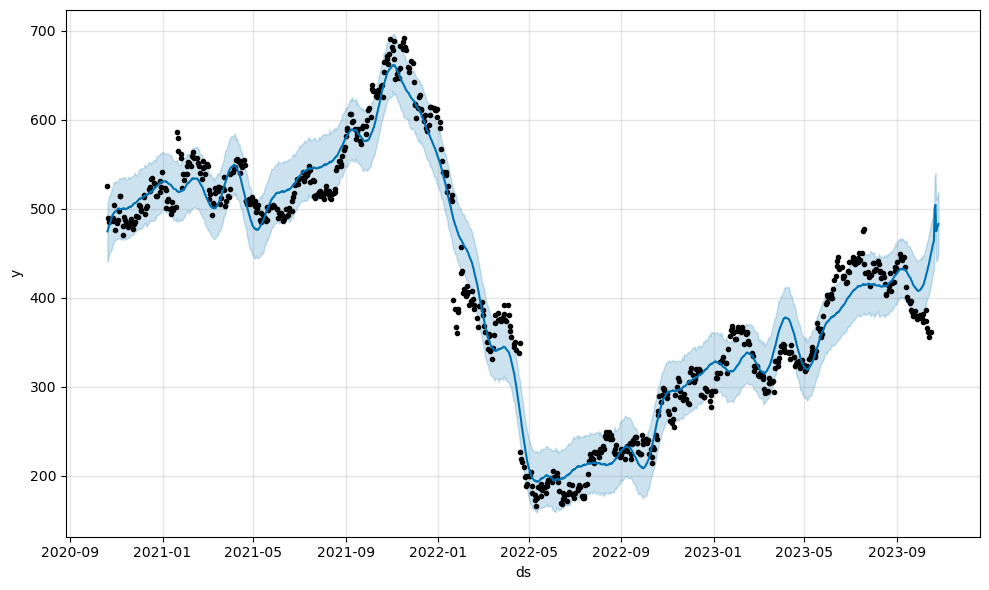

In [51]:
model.plot(pred)
plt.show()

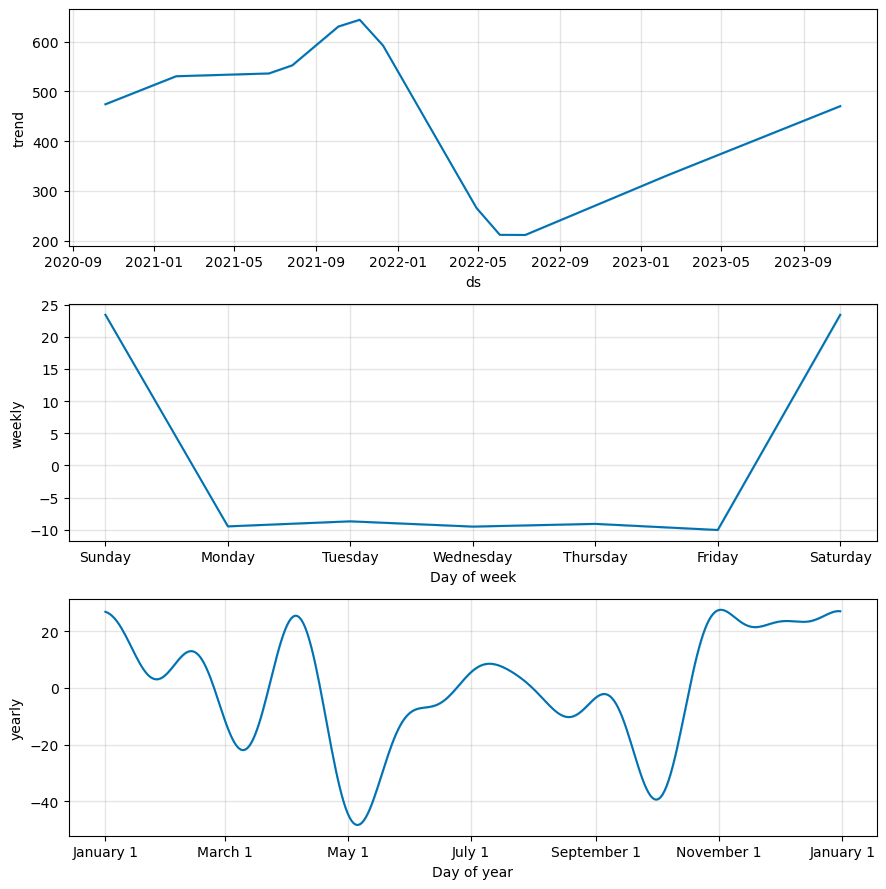

In [52]:
model.plot_components(pred)
plt.show()

In [53]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model,initial='90 days',period='45 days',horizon='90 days')
df_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/21 [00:00<?, ?it/s]

22:57:26 - cmdstanpy - INFO - Chain [1] start processing
22:57:26 - cmdstanpy - INFO - Chain [1] done processing
22:57:27 - cmdstanpy - INFO - Chain [1] start processing
22:57:27 - cmdstanpy - INFO - Chain [1] done processing
22:57:28 - cmdstanpy - INFO - Chain [1] start processing
22:57:28 - cmdstanpy - INFO - Chain [1] done processing
22:57:28 - cmdstanpy - INFO - Chain [1] start processing
22:57:28 - cmdstanpy - INFO - Chain [1] done processing
22:57:29 - cmdstanpy - INFO - Chain [1] start processing
22:57:29 - cmdstanpy - INFO - Chain [1] done processing
22:57:29 - cmdstanpy - INFO - Chain [1] start processing
22:57:29 - cmdstanpy - INFO - Chain [1] done processing
22:57:30 - cmdstanpy - INFO - Chain [1] start processing
22:57:30 - cmdstanpy - INFO - Chain [1] done processing
22:57:31 - cmdstanpy - INFO - Chain [1] start processing
22:57:31 - cmdstanpy - INFO - Chain [1] done processing
22:57:31 - cmdstanpy - INFO - Chain [1] start processing
22:57:31 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-01,411.446036,396.448328,426.147438,539.039978,2021-01-29
1,2021-02-02,365.658763,349.995294,380.699527,548.159973,2021-01-29
2,2021-02-03,312.715558,297.595602,326.475214,539.450012,2021-01-29
3,2021-02-04,259.833310,245.245694,274.051828,552.159973,2021-01-29
4,2021-02-05,195.191703,179.698245,209.617515,550.789978,2021-01-29


In [54]:
from prophet.diagnostics import performance_metrics

In [55]:
df_p=performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,5398.240857,73.472722,51.481112,0.139540,0.109306,0.145767,0.294872
1,10 days,8181.648059,90.452463,58.048859,0.150751,0.112587,0.164523,0.271795
2,11 days,11762.640672,108.455708,65.382422,0.164228,0.117537,0.185538,0.256410
3,12 days,15400.666717,124.099423,70.233001,0.173753,0.118636,0.202273,0.247692
4,13 days,19275.625864,138.836688,74.406138,0.181027,0.120833,0.215420,0.258974
...,...,...,...,...,...,...,...,...
77,86 days,155807.384443,394.724441,167.754295,0.414714,0.252533,0.417277,0.210059
78,87 days,209284.742797,457.476494,190.171612,0.461123,0.262730,0.426742,0.203297
79,88 days,332251.069765,576.412239,222.103115,0.531222,0.267227,0.454621,0.178571
80,89 days,439538.517685,662.977011,239.910969,0.573441,0.270681,0.467370,0.143590


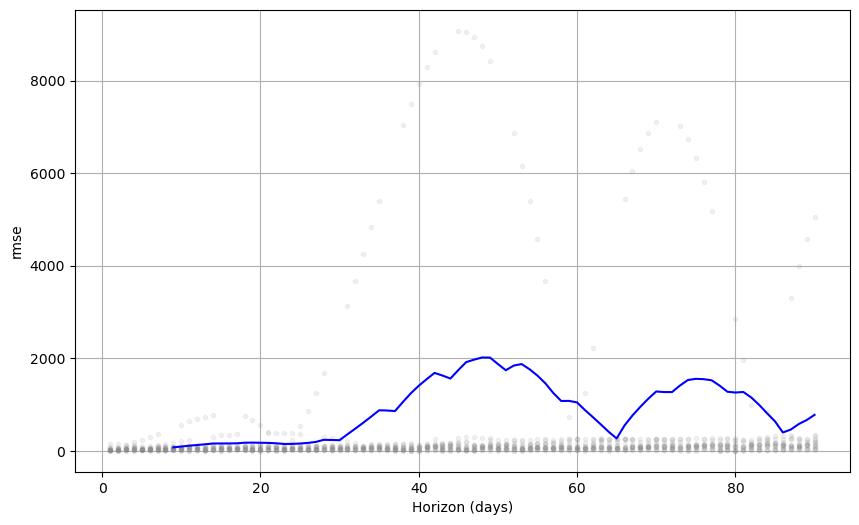

In [56]:
from prophet.plot import plot_cross_validation_metric
fig =plot_cross_validation_metric(df_cv,metric='rmse')

In [57]:
data=df.drop(['Open','High','Low','Close_Diff','Adj Close','Volume','month','year'],axis=1)

In [59]:
data.head()

,Close
Date,
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999
2020-10-26,488.239990


In [60]:
#First we need to find out the order of arima model using auto_arima
order=auto_arima(data['Close'])
order

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [61]:
train=data.iloc[:-70]
test=data.iloc[-30:]

In [62]:
train.shape

(682, 1)

In [63]:
test.shape

(30, 1)

In [64]:
model=ARIMA(train['Close'],order=(0,1,0)).fit()

In [79]:
pred=model.predict(start=722,end=751)

In [80]:
pred

722    438.100006
723    438.100006
724    438.100006
725    438.100006
726    438.100006
727    438.100006
728    438.100006
729    438.100006
730    438.100006
731    438.100006
732    438.100006
733    438.100006
734    438.100006
735    438.100006
736    438.100006
737    438.100006
738    438.100006
739    438.100006
740    438.100006
741    438.100006
742    438.100006
743    438.100006
744    438.100006
745    438.100006
746    438.100006
747    438.100006
748    438.100006
749    438.100006
750    438.100006
751    438.100006
Name: predicted_mean, dtype: float64

In [81]:
print(np.sqrt(mean_squared_error(test['Close'], pred)))

52.69362450407205


In [82]:
test['predicted']=pred.values

In [83]:
test

,Close,predicted
Date,,
2023-09-05,448.679993,438.100006
2023-09-06,445.760010,438.100006
2023-09-07,443.140015,438.100006
2023-09-08,442.799988,438.100006
2023-09-11,445.359985,438.100006
2023-09-12,434.690002,438.100006
2023-09-13,412.239990,438.100006
2023-09-14,400.489990,438.100006
2023-09-15,396.940002,438.100006
